# This is just the sample code showing the extraction of key fields from invoice images

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt
import re

In [2]:
pytesseract.pytesseract.tesseract_cmd=('C:\\Users\\sairam reddy\\AppData\\Local\\Programs\\Tesseract-OCR\\tesseract.exe')

## Reading a Image

In [3]:
img = cv2.imread('C:\\Users\\sairam reddy\\Desktop\\project\\num.jpg')
#cv2.imshow('img',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

## Image Preprocessing

In [4]:
image_grey=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#cv2.imshow('img',image_grey)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
#cv2.imwrite('C:\\Users\\sairam reddy\\Desktop\\OCR\\output\\image_grey.jpg',image_grey)

In [5]:
ret, thresh1 = cv2.threshold(image_grey, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

In [6]:
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25,25))

In [7]:
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)
#cv2.imshow('img',dilation)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

## Finding Countours

In [8]:
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

In [9]:
result=[]
axis=[]
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    # Drawing a rectangle on copied image
    rect = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    #Cropping the text block for giving input to OCR
    cropped = img[y:y + h, x:x + w]
    text = pytesseract.image_to_string(cropped)
    #Storing all the data 
    result.append(text)
    #storing all countours axis 
    axis.append([x,y,w,h])

## plotting the Bounding Boxes

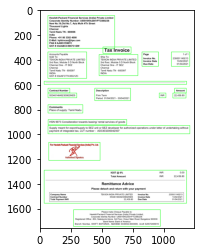

In [10]:
plt.imshow(rect)

## Stripping spaces in the extracted data

In [11]:
for i in range(0, len(result)):
    result[i]=result[i].strip()
    #result[i]=result[i].splitlines()

In [48]:
## Printing the data
for i in range(0,len(result)):
    print(result[i])

Please make Cheque Payable to:
Hewlett-Packard Financial Services (India) Private Limited,
Corporate Identity Number: U65910KA2001PTC080236
Registered Office: #24, Salarpuria Arena, 3rd Floor, Hosur Main Road, Bangalore 560030.
Bank Name: Bank of America
Branch: Mumbai, SWIFT: BOFAIN4X, ABA/BSB: 6430002-6000009, Acc#: 620572498010
IGST @ 0% INR 0.00
Total Amount INR 22,439.80
Remittance Advice
Please detach and return with your payment
Company Name TEKION INDIA PRIVATE LIMITED _ Invoice No. 230001149213
Contract Number 5534614649230902IND5 _—Invoice Date 13/02/2021
Total Payment INR 22,439.80 Due Date 01/04/2021
For Hewlett-Packard Financial Services (India) Pvt. Ltd.

Authorised Signatory
Supply meant for export/supply to SEZ unit or SEZ developer for authorized operations under letter of undertaking without
payment of integrated tax, LUT number : AD3303200042407
HSN 9973 Consideration towards leasing/ rental services of goods
Comments
Place of supply: Tamil Nadu
22,439.80
INR
5534614

In [12]:
dataframe=pd.DataFrame(columns=['Invoice Number','Sold To','Ship To','Description','Invoice Date','Due Date'])

## Function  for counting a element in a list

In [13]:
def countX(lst, x):
    count = 0
    for ele in lst:
        if (ele == x):
            count = count + 1
    return count

## Extracting "Description" from the data

In [14]:
for i in range (0,len(result)):
    #searching Description using regex
    if re.search('Description',result[i]):
        #Making the string into list of values 
        desc=(result[i].splitlines())
        #Removing spaces
        for i in range(0,countX(desc,'')):
            desc.remove('')
        #print(desc)
        #Removing description from the list and joining remaining values to get the description
        desc.remove('Description')
        dataframe['Description']=[','.join(desc)]
        #a=','.join(desc)
        #print(a)       

In [52]:
for i in range (0,len(result)):
    #searching Description using regex
    if re.search('Total',result[i]):
        #Making the string into list of values 
        total=(result[i].splitlines())
        #Removing spaces
        for i in range(0,countX(desc,'')):
            total.remove('')
        #print(total)
        #Removing description from the list and joining remaining values to get the description
        #desc.remove('Description')
        #a=','.join(desc)
        #print(a)       

## Extraction "Sold To" address 

In [15]:
sold=['Sold To:','sold to:','Bill to:','bill to:']
for i in range (0,len(result)):
    for j in sold:
        if re.search(j,result[i]):
            sold_add=(result[i].splitlines())
            for k in range(0,countX(sold_add,'')):
                sold_add.remove('')
            #print(sold_add)
            sold_add.remove(j)
            dataframe['Sold To']=[','.join(sold_add)]
            #b=','.join(sold_add)
            #print(b)

## Extracting "Ship To" address 

In [16]:
ship=['Ship To:','ship to:']
for i in range (0,len(result)):
    for j in ship:
        if re.search(j,result[i]):
            ship_add=(result[i].splitlines())
            for k in range(0,countX(ship_add,'')):
                ship_add.remove('')
            #print(ship_add)
            ship_add.remove(j)
            dataframe['Ship To']=[','.join(ship_add)]
            #c=','.join(ship_add)
            #print(c)

## Extracting "Due date" 

In [17]:
due_dates=[]
dates=[]
for i in range (0,len(result)):
    if re.search(r'Due Date',result[i]):
        due_dates.append(axis[i])
    if re.search(r'\d{1,2}/\d{1,2}/\d{4}',result[i]):
        dates.append(axis[i])
for i in due_dates:
    for j in dates:
         if i[1]==j[1] and i[3]==j[3] and i[0]!=j[0]:
                dataframe['Due Date']=[result[(axis.index(j))].splitlines()[(result[(axis.index(i))].splitlines()).index('Due Date')]]
                #print(result[(axis.index(i))].index('Due Date'))
                #print((result[(axis.index(i))].splitlines()).index('Due Date'))
                #print('Due Date-',result[(axis.index(j))].splitlines()[(result[(axis.index(i))].splitlines()).index('Due Date')])

In [55]:
for i in range (0,len(result)):
    if re.search(r'Due Date \d{1,2}/\d{1,2}/\d{4}',result[i]):
        a=re.findall(r'Due Date \d{1,2}/\d{1,2}/\d{4}',result[i])
        due_date=re.findall(r'\d{1,2}/\d{1,2}/\d{4}',a[0])
        print('One way to get due date-',due_date)
    #else re.search(r'Due Date',result[i]):
        #re.search
        
        
        

One way to get due date- ['01/04/2021']


## Extracting "Invoice Date"

In [18]:
invoice_date=[]
for i in range (0,len(result)):
    if re.search(r'Invoice Date',result[i]):
        invoice_date.append(axis[i])
for i in invoice_date:
    for j in dates:
         if i[1]==j[1] and i[3]==j[3] and i[0]!=j[0]:
                dataframe['Invoice Date']=[result[(axis.index(j))].splitlines()[(result[(axis.index(i))].splitlines()).index('Invoice Date')]]
                #print(result[(axis.index(i))].index('Due Date'))
                #print((result[(axis.index(i))].splitlines()).index('Due Date'))
                #print('Invoice date-',result[(axis.index(j))].splitlines()[(result[(axis.index(i))].splitlines()).index('Invoice Date')])

## Extracting "Invoice Number"

In [19]:
invoice_num=[]
for i in range (0,len(result)):
    if re.search(r'Invoice No.',result[i]):
        invoice_num.append(axis[i])
for i in invoice_num:
    for j in dates:
         if i[1]==j[1] and i[3]==j[3] and i[0]!=j[0]:
                dataframe['Invoice Number']=[result[(axis.index(j))].splitlines()[(result[(axis.index(i))].splitlines()).index('Invoice No.')]]
                #print(result[(axis.index(i))].index('Due Date'))
                #print((result[(axis.index(i))].splitlines()).index('Due Date'))
                #print('Invoice Number-',result[(axis.index(j))].splitlines()[(result[(axis.index(i))].splitlines()).index('Invoice No.')])

In [20]:
dataframe

,Invoice Number,Sold To,Ship To,Description,Invoice Date,Due Date
0,230001149213,"Accounts Payable,TEKION INDIA PRIVATE LIMITED....","TEKION INDIA PRIVATE LIMITED.,2nd floor, Modul...","Firm Term,Period 01/04/2021 - 30/04/2021",13/02/2021,01/04/2021


In [59]:
file_name = 'C:\\Users\\sairam reddy\\Desktop\\data\\data.xlsx'
dataframe.to_excel(file_name)